In [6]:
from gensim import corpora, models
import codecs, os
from smart_open import smart_open
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
################################################################################################################################
###### Обработка текстовых данных пользователя ######## 
f = codecs.open('dict_gensim_all.txt', 'r', 'utf-8')
lines = f.readlines()
print (len(lines))

1999


In [8]:
dictionary = corpora.Dictionary(line.lower().split() for line in smart_open('dict_gensim_all.txt', 'rb'))
dictionary.save(os.path.join('dict_gensim_all.dict'))  # store the dictionary, for future reference

In [9]:
# To actually convert tokenized documents to vectors:
corpus = [dictionary.doc2bow(text.split()) for text in lines]
corpora.MmCorpus.serialize(os.path.join('corp_users.mm'), corpus)

In [10]:
corp = corpora.MmCorpus(os.path.join('corp_users.mm'))
print(corp)

MmCorpus(1999 documents, 44956 features, 501953 non-zero entries)


In [12]:
# Обучение модели
%time ldamodel = models.ldamodel.LdaModel(corp, id2word=dictionary, num_topics=10, passes=10, alpha=1.25, eta=1.25)

Wall time: 3min 1s


In [13]:
# выводим топы слов
for index, topic in ldamodel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['ссылка', 'смс', 'отлично', 'проверять', 'чужой', 'прочитывать', 'просматривать', 'вызов', 'читать', 'телефон', 'звонок', 'мобильный', 'елочка', 'полянка', 'наряжать', 'украшать', 'profix', 'заработок', 'заполярный', 'mtblog', 'momdarinka', 'мандарин', 'кубик', 'ледяной', 'открытка', 'вязанка', 'перо', 'сено', 'серьга', 'привет']
Topic: 1 
Words: ['ксюха', 'приветик', 'нормальный', 'phoebe', 'привет', 'звонок', 'сайт', 'читать', 'смс', 'вирус', 'номер', 'mнe', 'проверять', 'кomп', 'рабочий', 'единственный', 'армянский', 'точка', 'шпион', 'icq', 'tonkin', 'телефон', 'позволять', 'переписка', 'мишка', 'штука', 'сервис', 'пробел', 'cпam', 'вpemя']
Topic: 2 
Words: ['свеча', 'резной', 'мастер', 'подарок', 'резныесвеча', 'handmade', 'класс', 'декор', 'заказывать', 'surgut', 'свечиручнойработа', 'находить', 'вощина', 'carvedcandle', 'свечиизвощина', 'семейныйочаг', 'carvedcandles', 'wedding', 'свадебныйдекор', 'свадебныесвеча', 'хмао', 'свечидимси', 'резныесвечисургут', 'ни

In [14]:
# Вычисляем логарифм перплексии и немного преобразуем, чтобы привести к общепринятому виду
perplexity = ldamodel.log_perplexity(list(corp))
print (2**(-perplexity))
perp = ldamodel.bound(corp)
2**(-perp/float(87409))

494.8233149727314


6.1973785784206185e+22

In [15]:
# Получение распределения тем для конкретного документа
doc = list(corp)
ldamodel.get_document_topics(doc)
num_topics_used = [len(ldamodel[doc]) for doc in corpus]

Text(0.5,0,'Число тем')

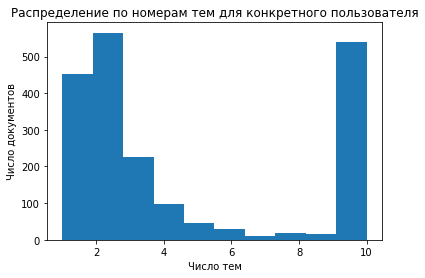

In [18]:
plt.hist(num_topics_used)
plt.title('Распределение по номерам тем для конкретного пользователя')
plt.ylabel('Число документов')
plt.xlabel('Число тем')